<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/Day_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASSIFICATION - SUPERVISED LEARNING**

##Iris-flower dataset

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
#import dataset
from sklearn.datasets import load_iris

In [ ]:
#load the data set
iris = load_iris()

#Defining our features and label
X = iris.data[:100,:2]
y = iris.target[:100]

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.shape

(150, 5)

In [ ]:
#Splitting our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create the model
model = LogisticRegression()

#Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predict on test-data
y_test_pred = model.predict(X_test)

In [ ]:
y_test_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
#Finding the confusion matrix

cm = confusion_matrix(y_test, y_test_pred)

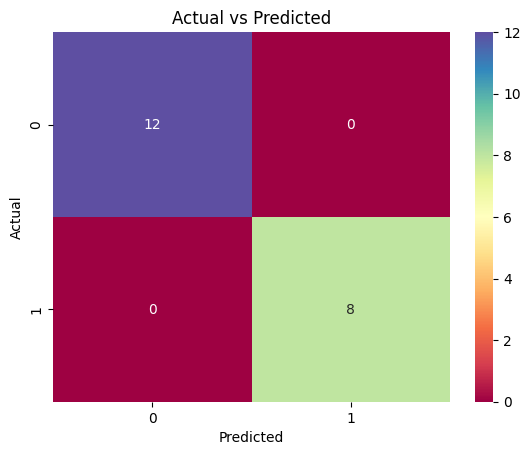

In [ ]:
#Visualize the confusion matix using a heatmap

sns.heatmap(cm,cmap="Spectral" ,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
#Measure model accuracy

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


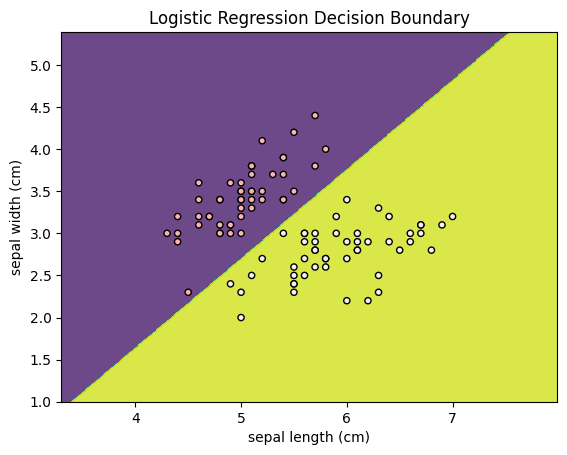

In [ ]:
#Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#Predict on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20, cmap='Pastel1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [ ]:
#Inferencing on Test Data
new_data = np.array([[9.1,3.5]])

#Predict using model
prediction = model.predict(new_data)
print("Prediction: ", prediction)

#Find class
class_name = iris.target_names[prediction[0]]
print("Class Name: ", class_name)

Prediction:  [1]
Class Name:  versicolor


In [ ]:
#Inferencing on Test Data
new_data1 = np.array([[2.2,3.5]])

#Predict using model
prediction1 = model.predict(new_data1)
print("Prediction: ", prediction1)

#Find class
class_name1 = iris.target_names[prediction1[0]]
print("Class Name: ", class_name1)

Prediction:  [0]
Class Name:  setosa


The model has been trained using LogisticRegression to classify the iris flower dataset into two categories.

##Diabetes dataset

In [ ]:
#For importing libraries,
#run the code in above dataset

In [35]:
#importing the diabetes dataset
# i have already mounted from my drive

#loading the diabetes datset
df = pd.read_csv('diabetes_dataset.csv')

In [ ]:
#To ensure that the dataframe has been loaded properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
#Defining features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome'].values

#splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Creating a model
model_1 = LogisticRegression(max_iter=1000)

#Fitting the model
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

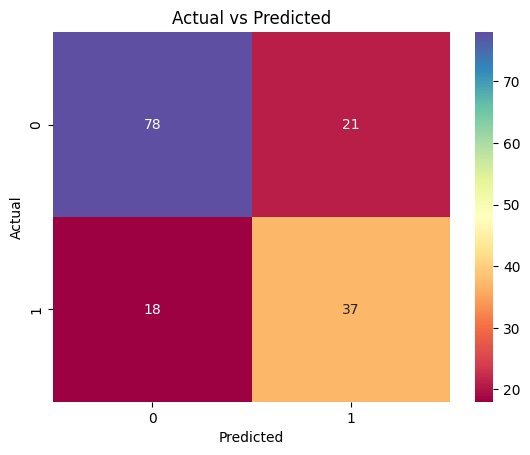

In [37]:
#Testing the model
y_test_pred = model_1.predict(X_test)

#Confusion matrix
cm1 = confusion_matrix(y_test, y_test_pred)

#Visualizing the confusion matrix
sns.heatmap(cm1, cmap='Spectral', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.show()

In [9]:
#Accuracy of the model

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7467532467532467
